# Exercício 5.2

Utilizando o dataset Pulsar Star (disponível no repositório da disciplina) construa um classificador SVM que classifique as amostras em estrelas de nêutrons ou não.  
Avalie a precisão, acurácia e varie o tipo de kernel e parâmetro C para este problema. (GridSearch é opcional mas recomendável).  

Qual foi a melhor configuração que você encontrou?  

Dica:  
 - Observe a matriz de confusão para verificar se o classificar está conseguindo classificar dados das duas classes;  
 - Normalize os dados;  

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [2]:
dataset = pd.read_csv('bases/pulsar_stars.csv')
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


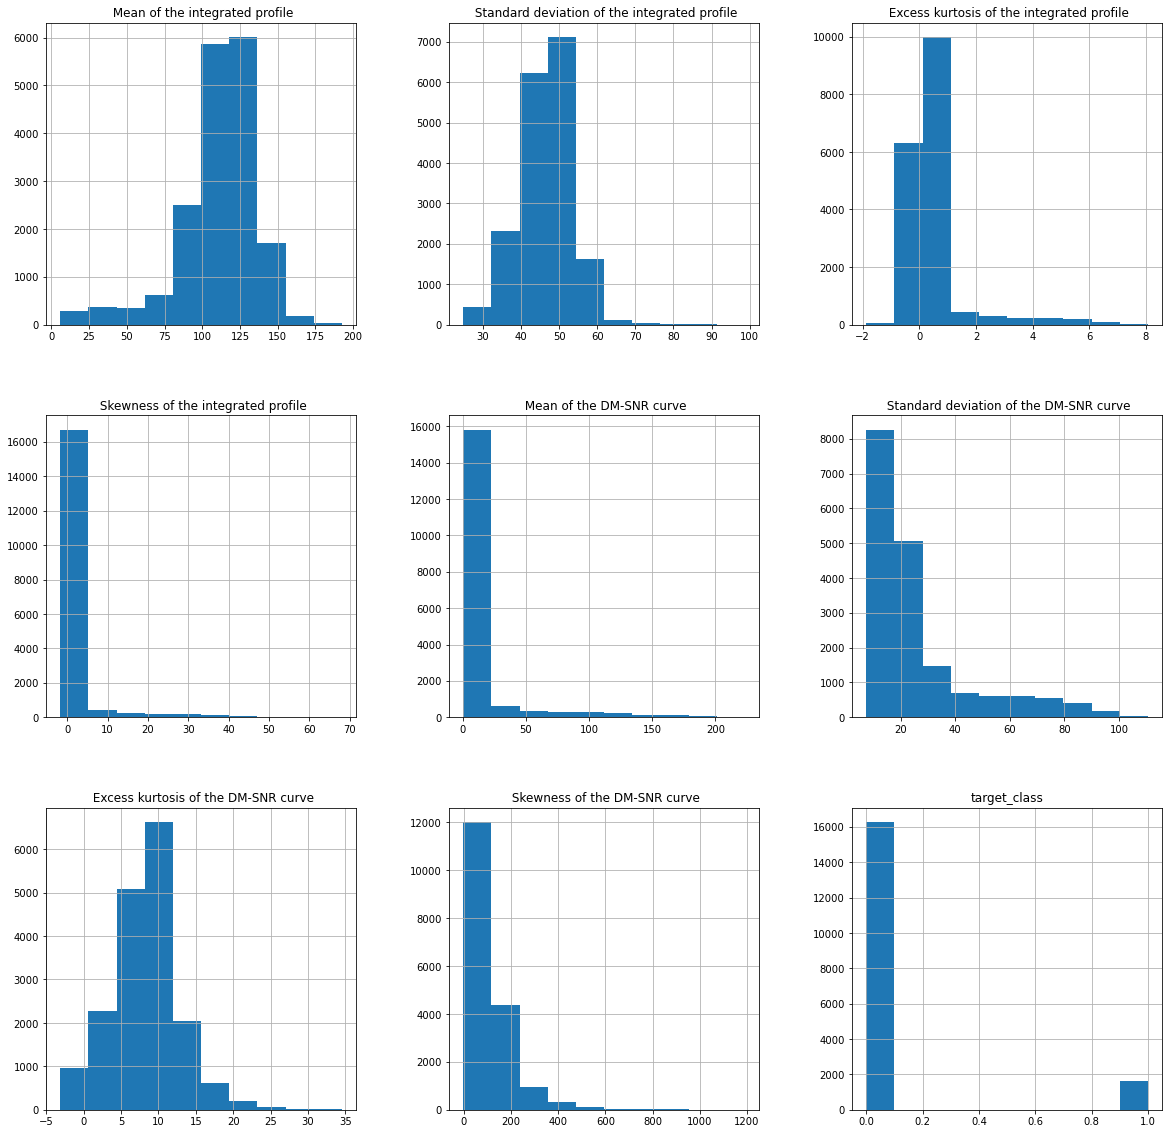

In [4]:
dataset.hist(figsize = (20,20));

<AxesSubplot:>

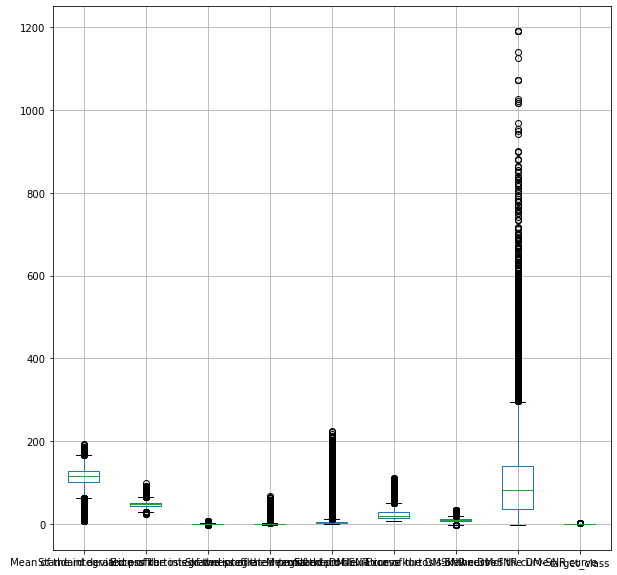

In [5]:
dataset.boxplot(figsize = (10,10))

In [6]:
dataset.shape

(17898, 9)

In [7]:
X = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
y = dataset.iloc[:,8].values

In [8]:
#Normalização do Conjunto utilizando StandardScaler
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [9]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'gamma': [1000,100, 10, 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'sigmoid', 'linear']}


grid_search = GridSearchCV(SVC(), param_grid,verbose = 3, cv=5, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)  

#Imprime os Melhores parâmetros Encontrados
print(grid_search.best_params_)

#Imprime os Melhores parâmetros Encontrados
print(grid_search.best_score_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 500 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:  5.5min finished


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.9808427518466658


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4867
           1       0.93      0.83      0.88       503

    accuracy                           0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370

0.978584729981378
[[4837   30]
 [  85  418]]


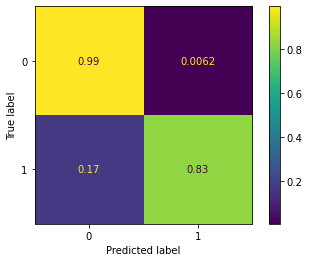

In [10]:
bestSVM = grid_search.best_estimator_

y_pred = bestSVM.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(bestSVM, X_test, y_test, normalize = 'true');


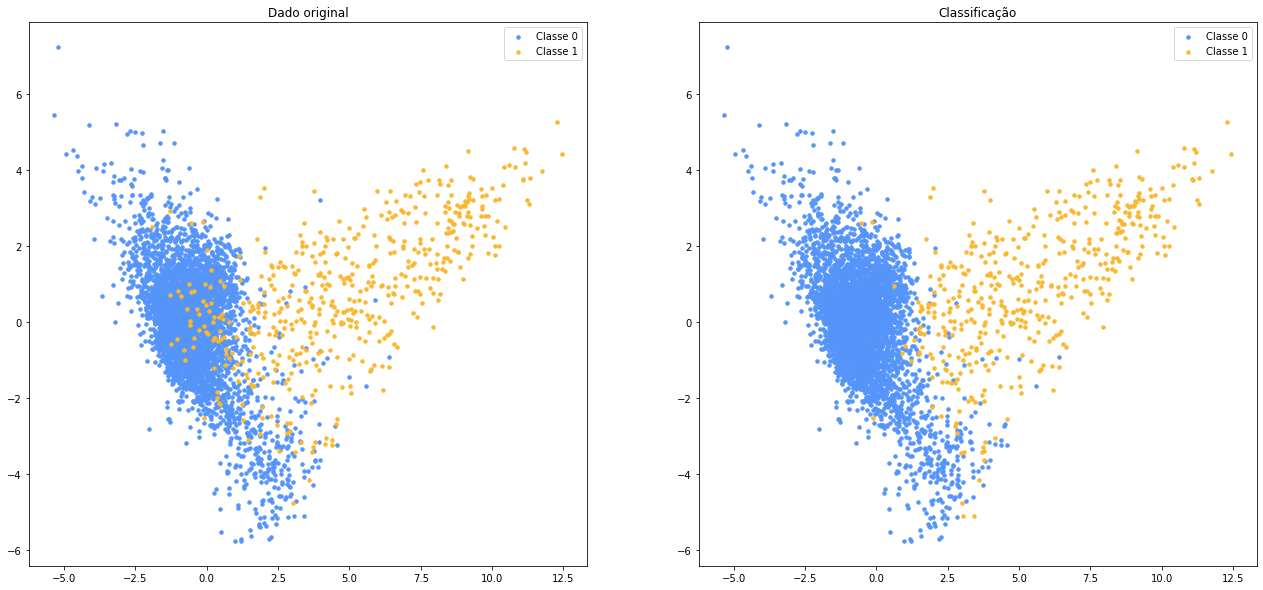

In [11]:
# Visualização 'simplificada' utilizando PCA
pca = PCA(n_components=2).fit_transform(X_test)

f, (ax1, ax2) = plt.subplots(figsize = (22,10), ncols = 2)
ax1.scatter(pca[y_test == 0, 0], pca[y_test == 0, 1], s = 12, c = '#5595FA', label = 'Classe 0')
ax1.scatter(pca[y_test == 1, 0], pca[y_test == 1, 1], s = 12, c = '#FAB72F', label = 'Classe 1')
ax1.legend()
ax1.set_title('Dado original')

ax2.scatter(pca[y_pred == 0, 0], pca[y_pred == 0, 1], s = 12, c = '#5595FA', label = 'Classe 0')
ax2.scatter(pca[y_pred == 1, 0], pca[y_pred == 1, 1], s = 12, c = '#FAB72F', label = 'Classe 1')
ax2.legend()
ax2.set_title('Classificação')

plt.show();

# Qual foi a melhor configuração que você encontrou?
A melhor combinação encontrada foi feita com o kernel 'rbf', gamma 0.1 e C 100.  
Para a combinação citada o valor de acurácia encontrado foi de 0.978, no entaanto a capacidade de reconhecer a classe 0 é muito mais efetiva do que a classe 1.
A configuração errou 85 dos preditos como classe 0 e 30 dos preditos como classe 1 dentre um total de 5370 amostras no conjunto de teste.